Scaling and Clustering of the spotify library:

In [1]:
import scalingclustering
from scalingclustering import load_playlist_pkl, kmeans_missing,\
yellowbricking, plot_clusters, apply_scaler, apply_kmeans, predict_kmeans, elbowing, silhouetting, save_pkl, load_pkl
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans


In [2]:

sp_library = load_playlist_pkl(path = 'Playlists')

In [3]:
sp_library.shape

(29707, 19)

In [4]:
pl_dict = {}
i = 0
for index in sp_library['playlistID'].value_counts().index:
    pl_dict[index] = i
    i += 1

In [5]:
for pl_id in sp_library['playlistID']:
    sp_library['playlistnr'] = pl_dict[pl_id]
   

In [6]:
sp_library['Year'] = pd.to_datetime(sp_library['ReleaseYear'], errors = 'coerce', format='%Y-%m-%d')
sp_library['Year'] = pd.DatetimeIndex(sp_library['Year']).year

Columns for clustering:
'danceability'
'energy'
'loudness'
'speechiness'  # detects the presence of spoken words in a track
'acousticness'
'instrumentalness'
'liveness'  # Detects the presence of an audience in the recording
'valence'  # A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track
'tempo'


Add later when data exists:
'time_signature'
'popularity'

In [7]:
X = sp_library[['danceability',
                'energy',
                'loudness',
                'speechiness',
                'acousticness',
               'instrumentalness',
               'liveness', 
                'valence',  
                'tempo',
                'Year',
                'Popularity']]

In [8]:
X_scaled_df, scaler = apply_scaler(X)
save_pkl(scaler, filename = "model/scalerKmeans.pickle")
save_pkl(X_scaled_df, filename = "model/X_scaled_df.pickle")

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year,Popularity
0,0.601,0.532,-9.119,0.0286,0.432,0.000006,0.0925,0.341,136.571,1972.0,79.0
1,0.484,0.508,-9.308,0.0364,0.376,0.000791,0.0961,0.554,151.867,1970.0,2.0
2,0.576,0.432,-13.642,0.0314,0.233,0.00135,0.0743,0.348,132.144,1995.0,60.0
3,0.579,0.508,-9.484,0.027,0.00574,0.000494,0.0575,0.609,147.125,2003.0,56.0
4,0.326,0.872,-7.602,0.122,0.214,0,0.461,0.492,173.381,1977.0,69.0


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year,Popularity
0,-0.112185,-0.491595,-0.071864,-0.613033,0.585258,-0.516493,-0.564527,-0.797574,0.573795,-1.846153,1.473741
1,-0.828515,-0.598384,-0.110680,-0.505613,0.391976,-0.514029,-0.540237,0.008442,1.121748,-1.959209,-1.728845
2,-0.265247,-0.936551,-1.000775,-0.574472,-0.101582,-0.512273,-0.687327,-0.771085,0.415205,-0.546014,0.683493
3,-0.246880,-0.598384,-0.146826,-0.635068,-0.885960,-0.514961,-0.800681,0.216568,0.951874,-0.093792,0.517125
4,-1.795865,1.021258,0.239690,0.673252,-0.167160,-0.516513,1.921840,-0.226173,1.892450,-1.563514,1.057821


We chose the number of 8 clusters.

In [9]:
n_clusters = 7 

In [10]:

labels, centroids, X_hat, n_clusters, max_iter = kmeans_missing('model/X_scaled_df.pickle', n_clusters= 10, max_iter=50 )
kmeans = apply_kmeans(pd.DataFrame(X_hat), n_clusters)
save_pkl(max_iter, filename = 'model/max_iter.pickle')
save_pkl(n_clusters, filename = 'model/n_clusters.pickle')
save_pkl(centroids, filename = 'model/centroids.pickle')
save_pkl(labels, filename = 'model/labels.pickle')
save_pkl(X_hat, filename = 'model/X_hat.pickle')


/Users/christoph/opt/anaconda3/envs/DA_Env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Users/christoph/opt/anaconda3/envs/DA_Env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [11]:
#labels, clusters = predict_kmeans(X_hat, X, centroids)
#plot_clusters(centroids, X, labels)

In [12]:
n_clusters, X_hat, labels

(10,
 array([[-0.11218544, -0.49159476, -0.07186386, ...,  0.57379453,
         -1.84615308,  1.4737411 ],
        [-0.82851455, -0.59838435, -0.11067975, ...,  1.12174773,
         -1.95920865, -1.72884453],
        [-0.26524722, -0.93655136, -1.00077532, ...,  0.41520479,
         -0.54601402,  0.6834927 ],
        ...,
        [-2.21831545,  0.7142376 ,  1.0028639 , ...,  1.08416909,
         -1.05476409, -1.81202857],
        [-1.52035376,  0.51400714,  0.63462639, ..., -1.53121839,
         -1.3939308 ,  0.93304483],
        [-1.01831115,  1.53295773,  0.87984423, ...,  0.10712441,
         -0.9982363 ,  1.14100493]]),
 array([0, 9, 1, ..., 5, 0, 5], dtype=int32))

In [13]:
#clusters
pd.Series(labels).value_counts().sort_index()

0    5165
1    3194
2    1350
3    1449
4    1728
5    3183
6    1560
7    6307
8    2084
9    3687
dtype: int64

In [14]:
#X_df = pd.DataFrame(X)
#X_hat["label"] = labels
sp_library['label'] = labels

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



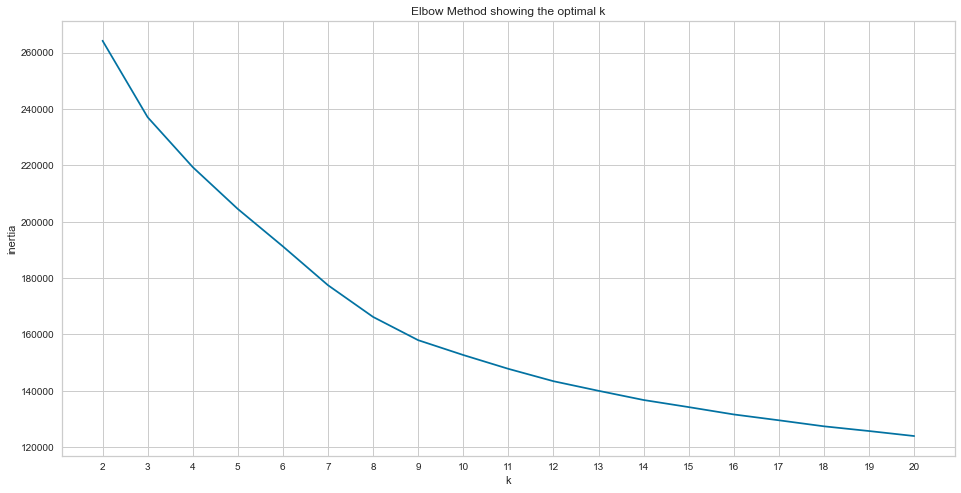

In [15]:
elbowing(path = 'model/X_hat.pickle')

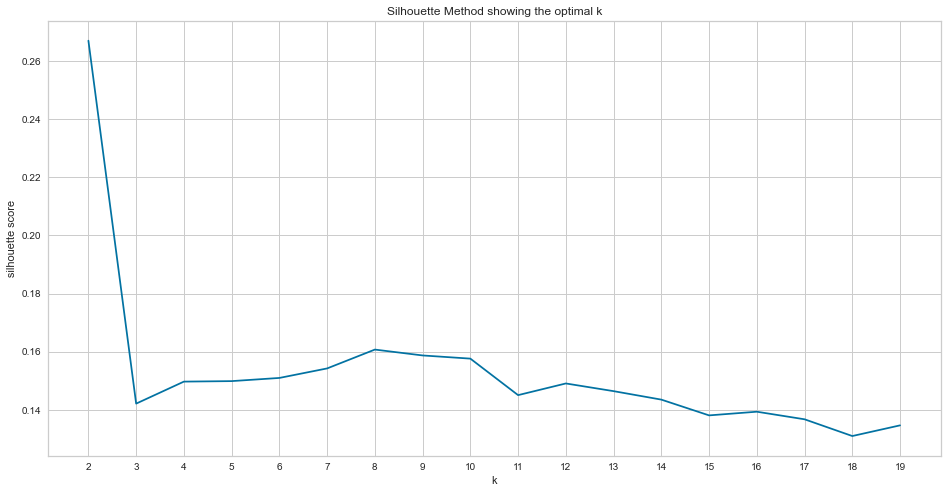

In [16]:
silhouetting(path='model/X_hat.pickle')

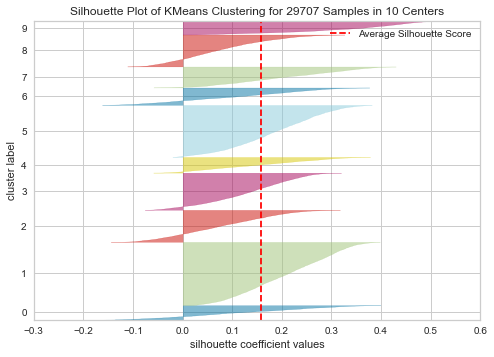

In [17]:
yellowbricking('model/X_hat.pickle', n_clusters)

In [18]:
#save_pkl(X, 'model/X.pickle')
#save_pkl(X_scaled_df, 'model/X_hat.pickle')
save_pkl(sp_library, ('model/sp_library.pickle'))
save_pkl(kmeans, filename = 'model/kmeans.pickle')
